In [4]:
import torch
import matplotlib.pyplot as plt
import three_layers as model
import Naicheng.res.process_data.process_output as pro_out
import Naicheng.res.process_data.process_raw_data as pr
import Naicheng.res.process_data.dire_and_coor as dc
import Naicheng.res.process_data.loop_overlap as lp
from Naicheng.res.process_data.dataset import tensor_dataset
from torch.utils.data import DataLoader
import seaborn as sns
import Naicheng.res.fnn.functions as func
import Naicheng.res.process_data.analysis_model as am
import numpy as np
import json
import Naicheng.res.process_data.rg2 as rg
from Naicheng.res.fnn.training import training_bce
import Naicheng.res.process_data.one_hot as oh

In [5]:
three_direction_input = np.load('../../data/three_directions.npy')
gen = model.GeneratorNet()
# epoch = 1000
# model_name = f'model_gan_{epoch}.pth.tar'
# check_point_gen = torch.load(model_name)
# gen.load_state_dict(check_point_gen['gen_state_dict'])

In [6]:
epoch = 100
model_name = f'model_gan_{epoch}.pth.tar'
check_point_gen = torch.load(model_name)
gen.load_state_dict(check_point_gen['gen_state_dict'])
a = am.process_scalar_model({}, gen, three_direction_input, 15)
print(a)

KeyboardInterrupt: 

In [ ]:
input_coor = np.load('../../data/coordinates.npy')
rg.rg2s(input_coor)

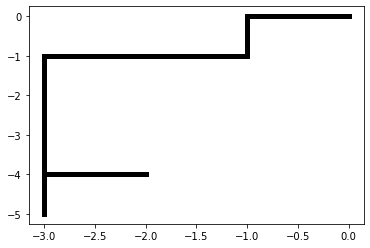

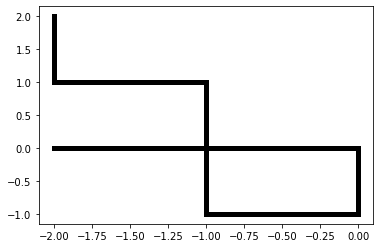

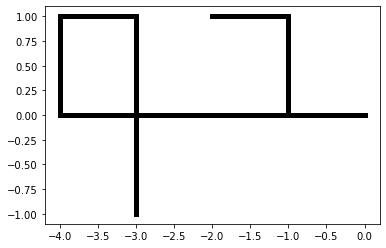

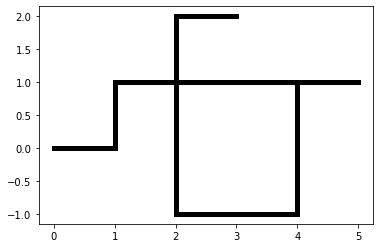

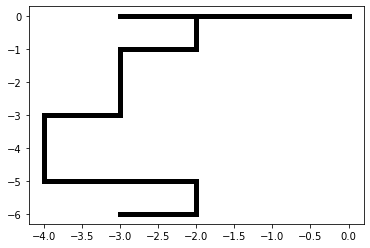

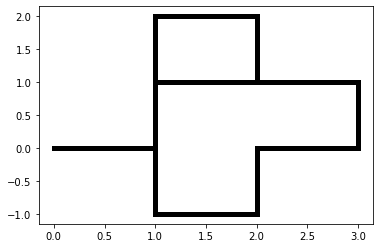

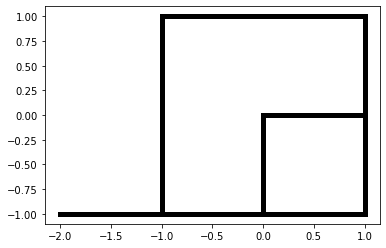

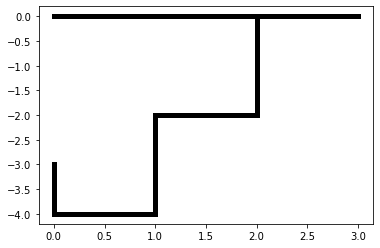

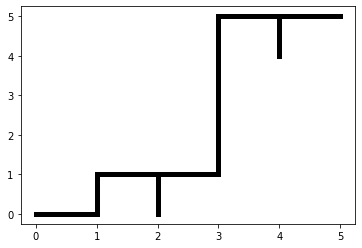

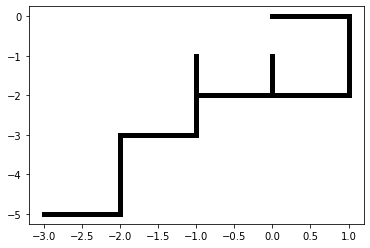

In [5]:
num_ite = 2000
output_directions = np.zeros([num_ite * 8, 15, 1])
output_one_hot = np.zeros([num_ite * 8, 15, 3])
for i in range(num_ite):

    # get output
    noise = func.get_noise(8, 8)
    output = gen(noise).data.numpy()

    # slice the output to a (n ,15 ,3)
    output_one_hot[8 * i: 8 * (i + 1)] = oh.slice_one_hot (output)
output_directions = oh.one_hots_directions(output_one_hot)

In [6]:
output_coordiantes = dc.direction_coordinate_three(output_directions)

In [7]:
sns.histplot(output_directions.flatten())

In [8]:
for i in range(30):
    pro_out.plot_polymer(output_coordiantes[i])